## 启动STATA17

In [1]:
import sys
sys.path.append('/usr/local/stata17/utilities')
from pystata import config
config.init('mp')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core , expiring  1 Jan 2025
Serial number: 501709301094
  Licensed to: Colin's Stata
               Love U

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


## 参考用法

In [2]:
%%stata?

Docstring:
Execute one line or a block of Stata commands.

When the line magic command **%stata** is used, a one-line Stata 
command can be specified and executed, as it would be in Stata's 
Command window. When the cell magic command **%%stata** is used, a 
block of Stata commands can be specified and executed all at once. 
This is similar to executing a series of commands from a do-file.

Cell magic syntax:

    %%stata [-d DATA] [-f DFLIST|ARRLIST] [-force]
     [-doutd DATAFRAME] [-douta ARRAY] [-foutd FRAMELIST] [-fouta FRAMELIST]
     [-ret DICTIONARY] [-eret DICTIONARY] [-sret DICTIONARY] [-qui] [-nogr]
     [-gw WIDTH] [-gh HEIGHT]

    Optional arguments:

      -d DATA               Load a NumPy array or pandas dataframe 
                            into Stata as the current working dataset.

      -f DFLIST|ARRLIST     Load one or multiple NumPy arrays or 
                            pandas dataframes into Stata as frames. 
                            The arrays and datafram

## VAR回归

In [3]:
%%stata -doutd df_from_stata

use https://www.stata-press.com/data/r17/lutkepohl2
var dln_inv dln_inc dln_consump if qtr<=tq(1978q4), lags(1/2) dfk
irf create order1, step(10) set(myirf1, replace)


. 
. use https://www.stata-press.com/data/r17/lutkepohl2
(Quarterly SA West German macro data, Bil DM, from Lutkepohl 1993 Table E.1)

. var dln_inv dln_inc dln_consump if qtr<=tq(1978q4), lags(1/2) dfk

Vector autoregression

Sample: 1960q4 thru 1978q4                      Number of obs     =         73
Log likelihood =    606.307                     AIC               =  -16.03581
FPE            =   2.18e-11                     HQIC              =  -15.77323
Det(Sigma_ml)  =   1.23e-11                     SBIC              =  -15.37691

Equation           Parms      RMSE     R-sq      chi2     P>chi2
----------------------------------------------------------------
dln_inv               7     .046148   0.1286   9.736909   0.1362
dln_inc               7     .011719   0.1142   8.508289   0.2032
dln_consump           7     .009445   0.2513   22.15096   0.0011
----------------------------------------------------------------

----------------------------------------------------------------

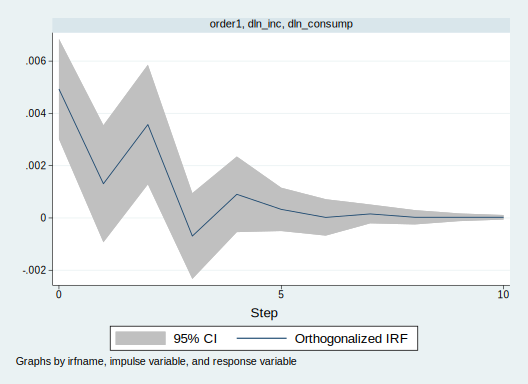

In [4]:
%%stata 
irf graph oirf, impulse(dln_inc) response(dln_consump)

In [5]:
df_from_stata

,inv,inc,consump,qtr,ln_inv,dln_inv,ln_inc,dln_inc,ln_consump,dln_consump
0,180,451,415,0,5.192957,8.988466e+307,6.111467,8.988466e+307,6.028278,8.988466e+307
1,179,465,421,1,5.187386,-5.570889e-03,6.142037,3.057003e-02,6.042633,1.435471e-02
2,185,485,434,2,5.220356,3.296995e-02,6.184149,4.211140e-02,6.073044,3.041124e-02
3,192,493,448,3,5.257495,3.713942e-02,6.200509,1.636028e-02,6.104793,3.174877e-02
4,211,509,459,4,5.351858,9.436274e-02,6.232448,3.193903e-02,6.129050,2.425718e-02
...,...,...,...,...,...,...,...,...,...,...
87,830,2620,2225,87,6.721426,-4.706764e-02,7.870930,1.538515e-02,7.707512,8.576393e-03
88,801,2639,2235,88,6.685861,-3.556442e-02,7.878155,7.225513e-03,7.711997,4.484177e-03
89,824,2618,2237,89,6.714170,2.830935e-02,7.870166,-7.989407e-03,7.712891,8.945465e-04
90,831,2628,2250,90,6.722630,8.459568e-03,7.873979,3.812790e-03,7.718686,5.794525e-03
